In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
data = pd.read_csv('/content/drive/MyDrive/core_datn/motor_detail.csv')
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,prev_broken
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,0
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,1
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,2
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,2
...,...,...,...,...,...,...,...,...
1046,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0,4
1047,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,3
1048,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,4
1049,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,5


In [3]:
data['owner'] = data['owner'].map({'1st owner': 1, '2nd owner': 2, '3rd owner': 3, '4th owner': 4}).fillna(data['owner'])
data['model_age'] = 2024 - data['year']
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,prev_broken,model_age
0,Royal Enfield Classic 350,175000,2019,Individual,1,350,NaN,0,5
1,Honda Dio,45000,2017,Individual,1,5650,NaN,1,7
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0,1,6
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0,2,9
4,Yamaha SZ [2013-2014],20000,2011,Individual,2,21000,NaN,2,13
...,...,...,...,...,...,...,...,...,...
1046,Bajaj ct 100,18000,2017,Individual,1,35000,32000.0,4,7
1047,Honda CB twister,16000,2012,Individual,1,33000,51000.0,3,12
1048,Bajaj Discover 125,15000,2013,Individual,2,35000,57000.0,4,11
1049,Honda CB Shine,12000,2009,Individual,1,53000,58000.0,5,15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1051 non-null   object 
 1   selling_price      1051 non-null   int64  
 2   year               1051 non-null   int64  
 3   seller_type        1051 non-null   object 
 4   owner              1051 non-null   int64  
 5   km_driven          1051 non-null   int64  
 6   ex_showroom_price  620 non-null    float64
 7   prev_broken        1051 non-null   int64  
 8   model_age          1051 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 74.0+ KB


In [5]:
X = data[['km_driven', 'prev_broken', 'model_age']]
X

,km_driven,prev_broken,model_age
0,350,0,5
1,5650,1,7
2,12000,1,6
3,23000,2,9
4,21000,2,13
...,...,...,...
1046,35000,4,7
1047,33000,3,12
1048,35000,4,11
1049,53000,5,15


In [6]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.31374356, -1.3366876 , -1.19284504],
       [-1.0806009 , -0.9058815 , -0.72531562],
       [-0.8012696 , -0.9058815 , -0.95908033],
       ...,
       [ 0.21048158,  0.38653677,  0.20974322],
       [ 1.00228685,  0.81734286,  1.14480206],
       [ 2.72811441,  2.54056722,  1.37856677]])

In [7]:
# Điểm tâm ban đầu cho các nhóm tốt, trung bình và kém
good_center = np.array([350, 0, 4])
medium_center = np.array([50000, 5, 10])
bad_center = np.array([130000, 13, 20])
centers = np.vstack((good_center, medium_center, bad_center))

In [8]:
# Khởi tạo và huấn luyện mô hình K-means
kmeans = KMeans(n_clusters=3, init=centers, n_init=1)
kmeans.fit(X_scaled)

KMeans(init=array([[   350,      0,      4],
       [ 50000,      5,     10],
       [130000,     13,     20]]),
       n_clusters=3, n_init=1)

In [11]:
# Dự đoán nhãn cho dữ liệu đã huấn luyện
labels = kmeans.labels_

# Hiển thị nhãn của các mẫu dữ liệu
print("Nhãn của các mẫu dữ liệu:")
for i, label in enumerate(labels):
    if label == 2:
        print(f"Mẫu {i + 1}: Hiệu suất tốt")
    elif label == 1:
        print(f"Mẫu {i + 1}: Hiệu suất trung bình")
    else:
        print(f"Mẫu {i + 1}: Hiệu suất kém")

Nhãn của các mẫu dữ liệu:
Mẫu 1: Hiệu suất tốt
Mẫu 2: Hiệu suất tốt
Mẫu 3: Hiệu suất tốt
Mẫu 4: Hiệu suất tốt
Mẫu 5: Hiệu suất trung bình
Mẫu 6: Hiệu suất kém
Mẫu 7: Hiệu suất tốt
Mẫu 8: Hiệu suất trung bình
Mẫu 9: Hiệu suất trung bình
Mẫu 10: Hiệu suất trung bình
Mẫu 11: Hiệu suất trung bình
Mẫu 12: Hiệu suất tốt
Mẫu 13: Hiệu suất tốt
Mẫu 14: Hiệu suất tốt
Mẫu 15: Hiệu suất tốt
Mẫu 16: Hiệu suất kém
Mẫu 17: Hiệu suất trung bình
Mẫu 18: Hiệu suất trung bình
Mẫu 19: Hiệu suất tốt
Mẫu 20: Hiệu suất trung bình
Mẫu 21: Hiệu suất kém
Mẫu 22: Hiệu suất tốt
Mẫu 23: Hiệu suất trung bình
Mẫu 24: Hiệu suất tốt
Mẫu 25: Hiệu suất tốt
Mẫu 26: Hiệu suất trung bình
Mẫu 27: Hiệu suất tốt
Mẫu 28: Hiệu suất tốt
Mẫu 29: Hiệu suất trung bình
Mẫu 30: Hiệu suất trung bình
Mẫu 31: Hiệu suất tốt
Mẫu 32: Hiệu suất kém
Mẫu 33: Hiệu suất trung bình
Mẫu 34: Hiệu suất tốt
Mẫu 35: Hiệu suất tốt
Mẫu 36: Hiệu suất tốt
Mẫu 37: Hiệu suất tốt
Mẫu 38: Hiệu suất tốt
Mẫu 39: Hiệu suất trung bình
Mẫu 40: Hiệu suất tốt
Mẫu 4

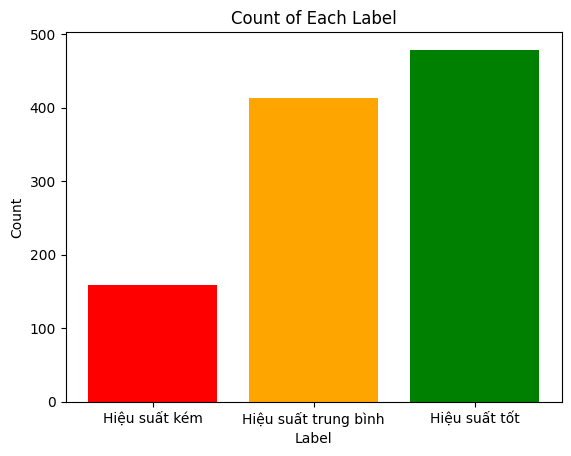

In [13]:
unique_labels, counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, counts, color=['red', 'orange', 'green'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.xticks(unique_labels, ['Hiệu suất kém', 'Hiệu suất trung bình', 'Hiệu suất tốt'])
plt.show()

In [14]:
predict_data = np.array([[10000, 4, 4]])

# Tạo một StandardScaler mới và sử dụng cùng các thông số đã được sử dụng để huấn luyện mô hình
scaler_new = StandardScaler()
scaler_new.mean_ = scaler.mean_
scaler_new.scale_ = scaler.scale_

# Chuẩn hóa dữ liệu mới
predict_data_scaled = scaler_new.transform(predict_data)

# Dự đoán nhãn cho dữ liệu mới
predicted_label = kmeans.predict(predict_data_scaled)

# Hiển thị nhãn dự đoán của dữ liệu mới
# print("Nhãn dự đoán:", predicted_label)
if predicted_label == 2:
    print("Nhãn dự đoán: Hiệu suất tốt")
elif predicted_label == 1:
    print("Nhãn dự đoán: Hiệu suất trung bình")
else:
    print("Nhãn dự đoán: Hiệu suất kém")

Nhãn dự đoán: Hiệu suất tốt
